Imports 

In [202]:
import pandas as pd
import numpy as np
import seaborn as sns
import json 
import matplotlib.pyplot as plt

Constants

In [203]:
VHT_LINE_COST = 1000000 #Euros
HT_LINE_COST = 300000 #Euros
TRANSFORMER_COST = 500000 #Euros

VHT_VOLTAGE = 400000
HT_VOLTAGE = 90000

Plants Data

In [204]:
df_plants = pd.read_excel("plants_table.xlsx")
df_plants.index += 1
df_plants = pd.DataFrame(df_plants)
df_plants

,Plants,x,y,production (MW)
1,C1,300,100,900
2,C2,600,100,500
3,C3,700,200,1200
4,C4,900,700,450
5,C5,500,500,750
6,C6,400,900,1200


Cities Data

In [222]:
df_cities = pd.read_excel("cities_table.xlsx")
df_cities.index += 1
df_cities = pd.DataFrame(df_cities)
df_cities

,City,x,y,consumption (MW)
1,V1,150,100,200
2,V2,400,80,300
3,V3,950,70,200
4,V4,30,120,250
5,V5,600,300,300
6,V6,20,450,250
7,V7,300,500,300
8,V8,950,450,300
9,V9,70,800,250
10,V10,350,750,150


Plant and City Network

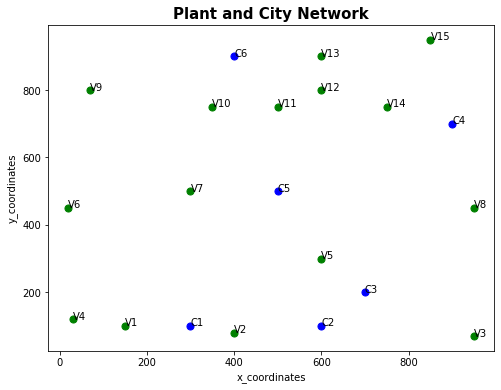

In [233]:
import numpy as np
import matplotlib.pyplot as plt
x_cityPoints, y_cityPoints, x_plantPoints, y_plantPoints= np.array(df_cities['x']), np.array(df_cities['y']), np.array(df_plants['x']), np.array(df_plants['y'])
cityAnnotations, plantAnnotations=['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V12','V13','V14','V15'], ['C1','C2','C3','C4','C5','C6']
plt.figure(figsize=(8,6))
plt.scatter(x_cityPoints,y_cityPoints,s=50,color="green")
plt.scatter(x_plantPoints,y_plantPoints,s=50,color="blue")
plt.xlabel("x_coordinates")
plt.ylabel("y_coordinates")
plt.title("Plant and City Network", weight = "bold",fontsize=15)
for i, label in enumerate(cityAnnotations):
    plt.annotate(label, (x_cityPoints[i], y_cityPoints[i]))
for i, label in enumerate(plantAnnotations):
    plt.annotate(label, (x_plantPoints[i], y_plantPoints[i]))
plt.show()